In [1]:
import nltk
import lxml
from urllib.request import urlopen,urlretrieve
from urllib.error import URLError
from zipfile import ZipFile
from bs4 import BeautifulSoup
import gzip
import shutil
import xml.etree.ElementTree as ET
from lxml import etree
import os, zipfile
import collections
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def download_xml_files(url,page,newdir,extension):
  #Use BeautifulSoup to clean up the page
  try:
      shutil.rmtree(newdir)
  except:
      print("error in deleting")
  os.mkdir( newdir)                                  
  soup = BeautifulSoup(page)
  for anchor in soup.findAll('a', href=True):
      links = url + anchor['href']
      if links.endswith(extension):
          ziplink = links
          zipfile = links[67:]
          zipfile2 = zipfile[:-3]
          response = urlopen(ziplink)
          zipcontent = response.read()
          completeName = os.path.join(newdir, zipfile2+ extension)
          with open (completeName, 'wb') as f:
              print("downloading.. " + zipfile)
              f.write(zipcontent)
              print(f)
              f.close()

In [4]:
# Unzip files:,
def extract_content(newdir,extension):
  cwd=os.getcwd()
  newfile=cwd+"/"+"deserialized.txt"
  if os.path.exists(newfile):
    os.remove(newfile)
  else:
    print("The file does not exist")
  for item in os.listdir(newdir): # loop through items in dir,
      if item.endswith(extension): # check for \.zip\ extension,
          print("file name",item)
          file_name = newdir + "/" + item
          f = gzip.open(file_name, 'rb')
          tree = ET.parse(f)
          root = tree.getroot()
          for node in root.iter('DOC'):
            for key,value in node.attrib.items():
              if value=='story':
                for elem in node.iter('TEXT'):
                  for ele in elem.iter():
                    if not ele.tag==elem.tag:
                      with open(newfile,"a+") as output:
                        output.write(str(ele.text)+ "\n")

In [5]:
url='https://cslu.ohsu.edu/~bedricks/courses/cs662/resources/GW-cna_eng/'
page = urlopen('https://cslu.ohsu.edu/~bedricks/courses/cs662/resources/GW-cna_eng/').read() 
newdir="/content/drive/MyDrive/Colab Notebooks"+"/cna_eng"
extension=".gz"

In [6]:

download_xml_files(url,page,newdir,extension)


downloading.. cna_eng_199710.xml.gz
<_io.BufferedWriter name='/content/drive/MyDrive/Colab Notebooks/cna_eng/cna_eng_199710.xml.gz'>
downloading.. cna_eng_199712.xml.gz
<_io.BufferedWriter name='/content/drive/MyDrive/Colab Notebooks/cna_eng/cna_eng_199712.xml.gz'>
downloading.. cna_eng_199802.xml.gz
<_io.BufferedWriter name='/content/drive/MyDrive/Colab Notebooks/cna_eng/cna_eng_199802.xml.gz'>
downloading.. cna_eng_199804.xml.gz
<_io.BufferedWriter name='/content/drive/MyDrive/Colab Notebooks/cna_eng/cna_eng_199804.xml.gz'>
downloading.. cna_eng_199806.xml.gz
<_io.BufferedWriter name='/content/drive/MyDrive/Colab Notebooks/cna_eng/cna_eng_199806.xml.gz'>
downloading.. cna_eng_199808.xml.gz
<_io.BufferedWriter name='/content/drive/MyDrive/Colab Notebooks/cna_eng/cna_eng_199808.xml.gz'>
downloading.. cna_eng_199810.xml.gz
<_io.BufferedWriter name='/content/drive/MyDrive/Colab Notebooks/cna_eng/cna_eng_199810.xml.gz'>
downloading.. cna_eng_199812.xml.gz
<_io.BufferedWriter name='/conten

In [8]:

extract_content(newdir,extension)

The file does not exist
file name cna_eng_199710.xml.gz
file name cna_eng_199712.xml.gz
file name cna_eng_199802.xml.gz
file name cna_eng_199804.xml.gz
file name cna_eng_199806.xml.gz
file name cna_eng_199808.xml.gz
file name cna_eng_199810.xml.gz
file name cna_eng_199812.xml.gz
file name cna_eng_199902.xml.gz
file name cna_eng_199904.xml.gz
file name cna_eng_199906.xml.gz
file name cna_eng_199908.xml.gz
file name cna_eng_199910.xml.gz
file name cna_eng_199912.xml.gz
file name cna_eng_200002.xml.gz
file name cna_eng_200004.xml.gz
file name cna_eng_200006.xml.gz
file name cna_eng_200008.xml.gz
file name cna_eng_200010.xml.gz
file name cna_eng_200012.xml.gz
file name cna_eng_200102.xml.gz
file name cna_eng_200104.xml.gz
file name cna_eng_200106.xml.gz
file name cna_eng_200108.xml.gz
file name cna_eng_200110.xml.gz
file name cna_eng_200112.xml.gz
file name cna_eng_200202.xml.gz
file name cna_eng_200308.xml.gz
file name cna_eng_200310.xml.gz
file name cna_eng_200312.xml.gz
file name cna_en

In [255]:
a_file = open("/content/deserialized.txt")
number_of_lines = 100
for i in range(number_of_lines):
    line = a_file.readline()
    print(line)

Mainland Chinese Foreign Minister Qian Qichen

was highly skeptical of Tokyo's explanations of the content of the

newly published US-Japan guidelines for defense cooperation when he

met Monday in Beijing with representatives of Japan's press.

Qian also said the time is not ripe yet for a trilateral official

dialogue among Washington, Beijing and Tokyo on defense, adding that

"scholarly discussion" would be appropriate at the present.

Qian's remarks indicate that despite explanations of the new

guidelines by Japanese Prime Minister Ryutaro Hashimoto and Foreign

Minister Keizo Obuchi, Beijing is still very worried about whether

Taiwan falls within the sphere of the bilateral defense agreement.

According to reports in the Japanese media, among Qian's concerns

are:

-- If the defense pact is a matter between Washington and Tokyo,

it should be unnecessary to renew it, hence putting its content into

doubt.

-- Although the new guidelines do not specifically mention

geographic c

**Part 2**

In [13]:
# Setup
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [14]:
def sentence_tokenization(input_file,output_result):
    count=0
    if os.path.exists(output_result):
        os.remove(output_result)
    else:
        print("The file does not exist")
    with open(input_file,"r") as output:
        text=output.readlines()
    
    text_remove_n = [x.replace('\n','') for x in text]
    sentences_final=" ".join(str(x) for x in text_remove_n)
    upper_case=sentences_final.upper()
    sent_tokenized = nltk.sent_tokenize(upper_case)
    for sentence in sent_tokenized:
      count+=1
      with open(output_result,"+a") as result:
        result.write(sentence + "\n")
    print(count)

**In this part, the function took a file as an input and read it line by line. then the new line characted has been removed and joined the sentences which was coming in multiple line. After that the list is converted into string. Now the file have sentences seperated with period. Then using sentence tokenizer the sentences are separated and saved line by line in a new file. **

In [15]:
input_file="/content/deserialized.txt"
output_result="/content/sample_data/Sent_tokenization_result.txt"



In [16]:
sentence_tokenization(input_file,output_result)

The file does not exist
585059


**Total number of sentences in the corpus are 585059**

**First 100 lines after sentence tokenization**

In [266]:
a_file = open("/content/sample_data/Sent_tokenization_result.txt")
number_of_lines = 100
with open("/content/sample_data/first_100_sent_tokenization_result.txt","w") as output:
  for i in range(number_of_lines):
      line = a_file.readline()
      output.write(line)

**Word Tokenization**

In [17]:
import string
def word_tokenization(input_file,output_result):
    if os.path.exists(output_result):
        os.remove(output_result)
    else:
        print("The file does not exist")
    with open(output_result,"+a") as output_text:
        with open(input_file,"r") as input_text:
            text=input_text.readlines()
        for line in text:
            line= line.translate(str.maketrans('','',string.punctuation))
            word_tokenized = nltk.word_tokenize(line)
            word_tokens=" ".join(str(x) for x in word_tokenized)
            output_text.write(word_tokens+'\n')

**I have used a modified version for removing puntuations from the entire file and it worked well on inverted commas and doulbe triple quotes.**

In [18]:

input_file="/content/sample_data/Sent_tokenization_result.txt"
output_result="/content/sample_data/word_tokenization_result.txt"

word_tokenization(input_file,output_result)

The file does not exist


First 100 lines after word tokenization

In [265]:
a_file = open("/content/sample_data/word_tokenization_result.txt")
number_of_lines = 100
with open("/content/sample_data/first_100_word_tokenization_result.txt","w") as output:
  for i in range(number_of_lines):
      line = a_file.readline()
      output.write(line)

**PART III**

In [28]:
from nltk.util import ngrams
from collections import Counter
from nltk.corpus import stopwords

In [36]:
def part_3(input_file, graph_output):
  with open(input_file,"r") as tokens:
      text=tokens.read()

  word_tokens=nltk.word_tokenize(text)
  print("total word_tokens:", len(word_tokens))

  ## Part 1:
  unique_words=list(set(word_tokens))
  print("Part 1:")
  print("Total unique types:  ",len(unique_words),"\n")

  ## Part 2:
  val_total=[]
  unigrams = ngrams(word_tokens,1)
  c=Counter(unigrams)
  print("Part 2:")
  print("Total unigram tokens",len(c),"\n")

  ## Part 3:
  import numpy as np
  import matplotlib.pylab as plt
  frequency={}
  for x, y in c.items():
      for key in x:
          frequency.update({key:y})
      
  freq = frequency.values()
  f = list(freq)
  f.sort(reverse=True)
  ranks = range(1, len(f)+1)
  plt.plot(ranks, f)
  plt.ylabel('log(frequency)')
  plt.xlabel('log(rank)')
  plt.yscale('log')
  plt.xscale('log')
  plt.savefig(graph_output)


  ## Part 4:
  print("Part 4:")
  print("The 30 most frequent words are:  \n")
  for val, count in c.most_common(30):
      for tups in val:
          print(tups,count)
          val_total.append(tups)
          
  ## Part 5:
  stop_words = set(stopwords.words('english'))
  filtered_sentence = []  
  for w in word_tokens:  
      lowerword=w.lower()
      if lowerword not in stop_words:  
          filtered_sentence.append(w)  

  #print(filtered_sentence) 

  ## Part 6

  print("\n Part 5/6:")
  print("The 30 most frequent words after removing stop words:  \n")
  val_total_remov_stop=[]
  unigrams_new = ngrams(filtered_sentence,1)
  c_new=Counter(unigrams_new)
  for val, count in c_new.most_common(30):
      for tups in val:
        print(tups,count)
        val_total_remov_stop.append(tups)



total word_tokens: 16416618
Part 1:
Total unique types:   138420 

Part 2:
Total unigram tokens 138420 

Part 4:
The 30 most frequent words are:  

THE 1219252
TO 511901
OF 505729
AND 397237
IN 366589
A 292772
THAT 213959
SAID 182444
FOR 161746
TAIWAN 156616
ON 137044
WILL 119408
WITH 118781
IS 113043
AT 100494
AS 99989
BY 98934
HE 87063
BE 80622
FROM 80583
HAS 76043
WAS 62642
CHINA 58284
AN 57912
PERCENT 56560
ITS 55761
HAVE 54168
NOT 53478
IT 52786
HIS 52227

 Part 5/6:
The 30 most frequent words after removing stop words:  

SAID 182444
TAIWAN 156616
CHINA 58284
PERCENT 56560
ALSO 46602
TAIWANS 46425
CHEN 42420
GOVERNMENT 41490
PRESIDENT 39952
TAIPEI 36700
YEAR 36304
TWO 33265
MAINLAND 32436
NEW 31262
PEOPLE 29547
CHINESE 28906
ACCORDING 28557
ECONOMIC 26985
US 26659
PARTY 24495
BILLION 24212
FIRST 24029
NATIONAL 23910
ONE 23843
FOREIGN 23515
WOULD 22702
YEARS 22394
INTERNATIONAL 21710
OFFICIALS 21655
LOCAL 21156


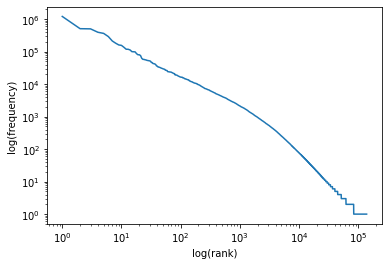

In [37]:
input_file="/content/sample_data/word_tokenization_result.txt"
graph_output="/content/sample_data/rand_and_freq.png"
part_3(input_file,graph_output)

Before removal of stop words, the 30 most frequent word list is more kind of stop words and not meaning ful words. There are few words in english "stopwords" collections which are letters rather than words. Also, there are few words which has no meanings in english. We could add other words in the stopwords list but I did not get a chance to work on it due to time limitations.

**PART IV** - Word association metrics


In [267]:
def total_token_count(ngram_dict):
    return sum(ngram_dict.values())

In [268]:
def total_type_count(ngram_dict):
    return len(ngram_dict.values())

In [269]:
def intdefaultdict():
    return collections.defaultdict(int)

In [270]:
def load_object(filename):
    with open(filename, 'rb') as object_file_stream:
        return pickle.load(object_file_stream)

In [271]:
def file_to_unigram_dict(input_file="/content/sample_data/word_tokenization_result.txt",
                         output_file='/content/sample_data/unigram_count_dict.pkl',):

    unigram_count_dict = collections.defaultdict(int)
    with open(input_file, 'r') as input_stream:
        line = input_stream.readline()
        while line:
            split_line = line[:-1].split(' ')
            for token in split_line:
                unigram_count_dict[token] += 1
            line = input_stream.readline()

    with open(output_file, 'wb') as output:
        pickle.dump(unigram_count_dict, output, pickle.HIGHEST_PROTOCOL)

In [272]:
def file_to_bigram_dict(input_file='/content/sample_data/word_tokenization_result.txt',
                        output_file='/content/sample_data/bigram_count_dict.pkl'):

    bigram_count_dict = collections.defaultdict(intdefaultdict)
    with open(input_file, 'r') as input_stream:
        line = input_stream.readline()
        while line:
            split_line = line[:-1].split(' ')
            for i in range(len(split_line)-1):
                bigram_count_dict[split_line[i]][split_line[i+1]] += 1
            line = input_stream.readline()

    with open(output_file, 'wb') as output:
        pickle.dump(bigram_count_dict, output, pickle.HIGHEST_PROTOCOL)

In [277]:
def unigram_probabilities(ngram_dict, threshold=0):
    
    unigram_prob_dict = collections.defaultdict(float)
    token_count = float(total_token_count(ngram_dict))
    for token_type in ngram_dict:
        if ngram_dict[token_type] > threshold:
            prob = float(ngram_dict[token_type])/token_count
            unigram_prob_dict[token_type] = prob

    return unigram_prob_dict

In [278]:
def bigram_probabilities(bigram_dict, threshold=0):

    bigram_prob_dict = collections.defaultdict(intdefaultdict)
    for previous_token in bigram_dict:
        prev_prob = unigram_probabilities(bigram_dict[previous_token],
                                              threshold)
        bigram_prob_dict[previous_token] = prev_prob

    return bigram_prob_dict

In [279]:
def get_pmi(input_bigram='/content/sample_data/bigram_count_dict.pkl',
            input_unigram='/content/sample_data/unigram_count_dict.pkl',
            threshold=0):


    bigram_count_dict = load_object(input_bigram)
    unigram_count_dict = load_object(input_unigram)

    bigram_prob_dict = bigram_probabilities(bigram_count_dict, threshold)
    unigram_prob_dict = unigram_probabilities(unigram_count_dict)

    pmi_list = list()

    for item in bigram_prob_dict:
        for token in bigram_prob_dict[item]:
            pmi = bigram_prob_dict[item][token]/unigram_prob_dict[token]
            pmi_list.append([pmi, item, token])
    pmi_list.sort(reverse=True, key=lambda pair: pair[0])
    return pmi_list

In [ ]:
file_to_unigram_dict()
file_to_bigram_dict()

In [276]:
pmi_list_thresh_0 = get_pmi()
print("30 highest PMI pairs with threshold 0 are: ")
for index in range(30): print(pmi_list_thresh_0[index])

# With a threshold of 100, what are the 10 highest-PMI word pairs?
pmi_list_thresh_100 = get_pmi(threshold=100)
print("\n 10 highest PMI pairs with threshold 100 are: \n")
for index in range(10): print(pmi_list_thresh_100[index])

# Experiment with a few different threshold values, and report on what you observe.

pmi_list_thresh_300 = get_pmi(threshold=300)
print("\n 10 highest PMI pairs with threshold 300 are: \n")
for index in range(10): print(pmi_list_thresh_300[index])

pmi_list_thresh_1000 = get_pmi(threshold=1000)
print("\n 10 highest PMI pairs with threshold 1000 are: \n")
for index in range(10): print(pmi_list_thresh_1000[index])
print("\n PMI for “New York”: \n")
for pmi_itter in pmi_list_thresh_0:
	if pmi_itter[1] == 'NEW' and pmi_itter[2] == 'YORK':
		print(pmi_itter)

30 highest PMI pairs with threshold 0 are: 
[16416631.0, 'HANNES', 'FARLEITER']
[16416631.0, 'FREIE', 'DEMOKRATISCHE']
[16416631.0, 'CEP006', '100397']
[16416631.0, 'NICOSIA', 'GORGIE']
[16416631.0, 'GORGIE', 'MURADOV']
[16416631.0, 'CAUSUS', 'BELLI']
[16416631.0, 'HARDCOVER', 'GILTEDGED']
[16416631.0, 'US1457', 'US1522']
[16416631.0, 'FAYEZ', 'ZAWARNEH']
[16416631.0, 'CEP002', '100797']
[16416631.0, 'NN1', 'NN2']
[16416631.0, 'TULAGA', 'MANUELLA']
[16416631.0, 'LUCILLE', 'ROYBALALLARD']
[16416631.0, 'HALLDOR', 'ASGRIMSSON']
[16416631.0, 'WAHYO', 'DJATMIKO']
[16416631.0, 'FLAVONOID', 'SPONIN']
[16416631.0, 'ZCCZ', 'CEP007']
[16416631.0, 'CEP007', '101097']
[16416631.0, 'FRIEDRICH', 'NAUMANN']
[16416631.0, 'ANDRIS', 'AMERIKS']
[16416631.0, 'GERMANIC', 'MANHOOD']
[16416631.0, 'HIMMLERS', 'NUTTY']
[16416631.0, 'ZAIMAN', 'NURMATIAS']
[16416631.0, 'ESTRADE', 'OYUELA']
[16416631.0, 'TOFILAU', 'ETI']
[16416631.0, 'STEPAN', 'KERKYASHARIAN']
[16416631.0, 'ARY', 'MARDJONO']
[16416631.0, 'MESUT',

**The PMI for "New York" is comparatively very low. In my understanding the conditional probabily is low since the word "NEW" is very common with any other word other then "YORK". "NEW" can pair frequently with other words also.**